# Troca de Marcha

Usando bibliotecas de Machine Learning: 

* Matplotlib
* Numpy
* Scikit-Learn

@SS


### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [2]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Populando com dados

`reshape()` Da uma nova forma à matriz, neste caso 2D

In [3]:
x = np.array([1,2,3,4,5]).reshape(-1,1)  #r   rpm
y = np.array([7.5,9,10.4,9.1,7.8]).reshape(-1,1)   #K(r)

### Utilizando a regressão

`poly_features` Gera funcionalidades polinomiais e de interação

In [4]:
grau = 2  # grau do polinómio
poly_features = PolynomialFeatures(degree = grau, include_bias=False)

In [5]:
X_poly = poly_features.fit_transform(x)  # é esperado uma matriz 2D

In [6]:
model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [7]:
X_vals = np.linspace(-2, 8, 100).reshape(-1,1)  #demarca o x, de -2 até 8
X_vals_poly = poly_features.transform(X_vals)

In [8]:
y_vals = model.predict(X_vals_poly)

### Gráfico com Matplotlib

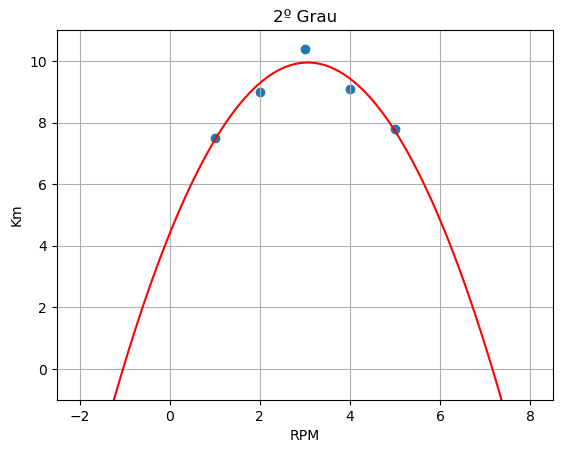

In [9]:
plt.scatter(x,y)  #os pontos 
plt.plot(X_vals, y_vals, color="r") #a regressão

plt.ylim(-1,11)

plt.title(f"{grau}º Grau")
plt.xlabel("RPM")
plt.ylabel("Km")

plt.grid(True, which="both")
#plt.savefig(f"fig{grau}.png")
plt.show()


### Ponto de interceptação

In [10]:
model.intercept_ 

array([4.4])

### Coeficientes 

In [11]:
model.coef_

array([[ 3.62714286, -0.59285714]])

In [12]:
model.score(X_poly,y)

0.9251143495372831

### Montando a fórmula encontrada

No caso , essa fórmula só serve para quadrática, para criar uma função mais geral, teria que fazer validação de dados, com referência na quantidade de elementos no `model.coef_`

In [13]:
a = model.coef_[0][1]
b = model.coef_[0][0]
c = model.intercept_[0]

In [14]:
print(f"A fórmula {grau} grau: f(x)= {a}x²+{b}x+{c}")

A fórmula 2 grau: f(x)= -0.5928571428571435x²+3.627142857142861x+4.399999999999994


In [15]:
"""  
def main():
    x = sym.symbols("x")
    
def funcao(num:int):
     return (round(a,3) *num **2 + round(b,3) *num + round(c,3))

  
if __name__ == "__main__":
    main()
"""

'  \ndef main():\n    x = sym.symbols("x")\n    \ndef funcao(num:int):\n     return (round(a,3) *num **2 + round(b,3) *num + round(c,3))\n\n  \nif __name__ == "__main__":\n    main()\n'

### Gráficos de funções de diferentes graus

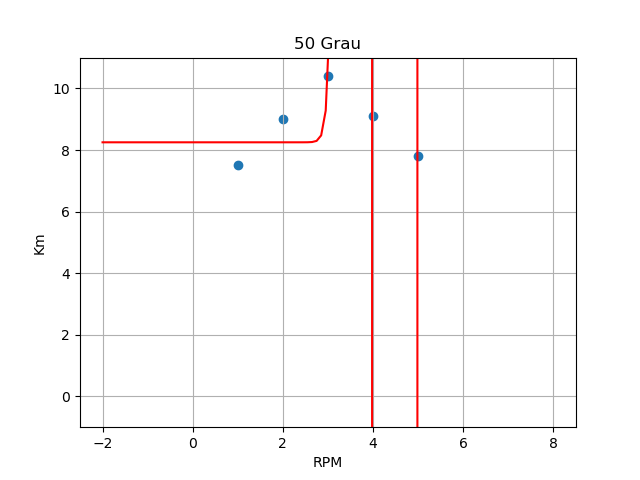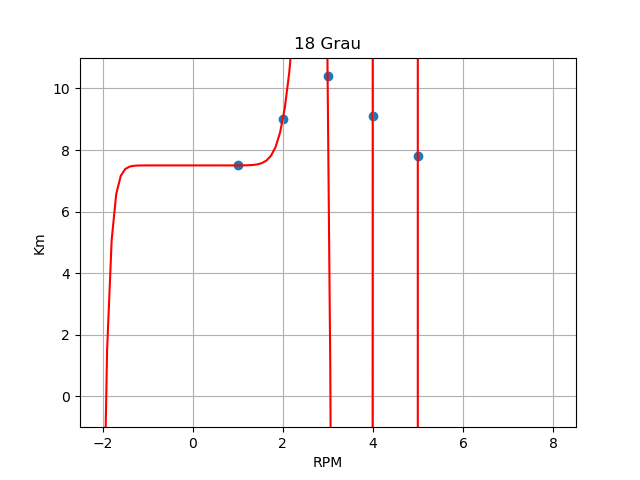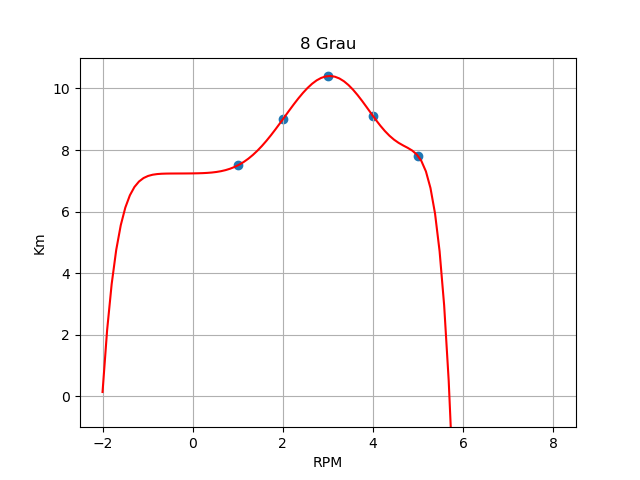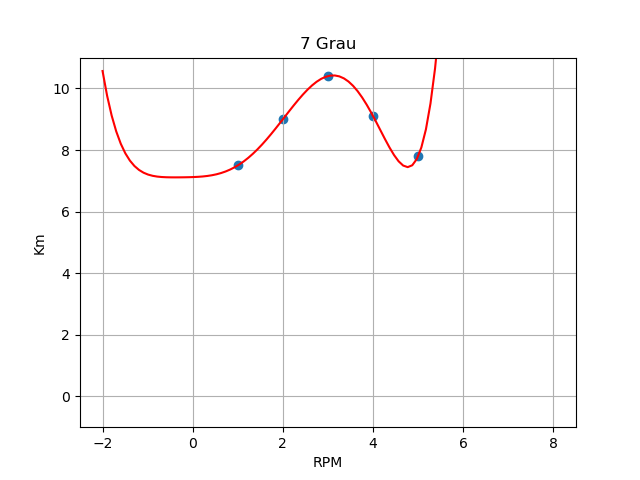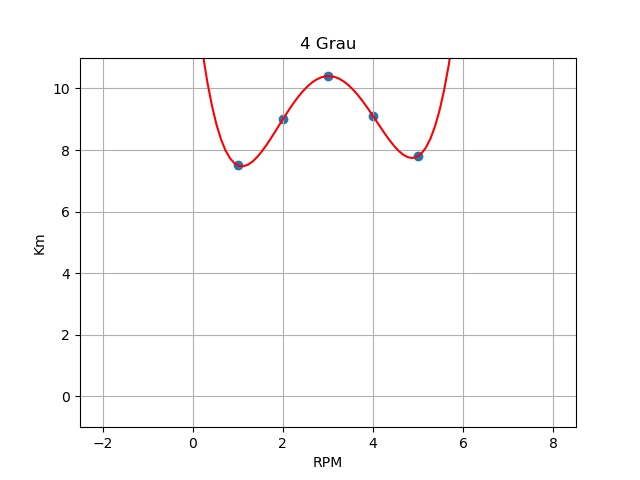